In [1]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=967409d781acf65a9e52fdb14523d51c026e908fec62ad1178423ba227c6d6b4
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
# Definição das constantes
BUDGET_DESC = "The client has already allocated a budget for the purchase of the offered product!"
AUTHORITY_DESC = "I am already in contact with and interacting with the person who has the authority to make the purchase decision!"
NEED_DESC = "The client has a need that my product addresses very well!"
TIME_DESC = "I know the deadline by which the client wants their need met with our product!"

OPPORTUNITY_ASSESSMENT_DESC = "Opportunity assessment"

TOTALLY_DISAGREE = 'I totally disagree'
PARTIALLY_DISAGREE = 'I partially disagree'
DONT_KNOW = 'I don\'t know'
PARTIALLY_AGREE = 'I partially agree'
TOTALLY_AGREE = 'I totally agree'

VERYPOOR = 'Very Poor'
BAD = 'Bad'
NEUTRAL = 'Neutral'
GOOD = 'Good'
EXCELLENT = 'Excellent'

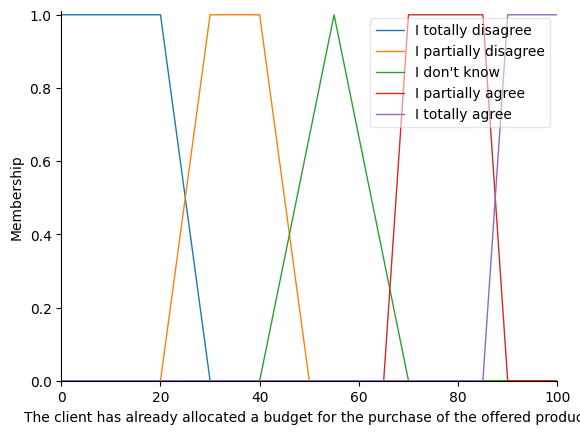

In [5]:
budgetCtrl = ctrl.Antecedent(np.arange(0,101,1),BUDGET_DESC)

budgetCtrl[TOTALLY_DISAGREE] = fuzz.trapmf(budgetCtrl.universe, [0,0,20,30])
budgetCtrl[PARTIALLY_DISAGREE] = fuzz.trapmf(budgetCtrl.universe, [20,30,40,50])
budgetCtrl[DONT_KNOW] = fuzz.trimf(budgetCtrl.universe, [40,55,70])
budgetCtrl[PARTIALLY_AGREE] = fuzz.trapmf(budgetCtrl.universe, [65,70,85,90])
budgetCtrl[TOTALLY_AGREE] = fuzz.trapmf(budgetCtrl.universe, [85,90,100,100])
budgetCtrl.view( )

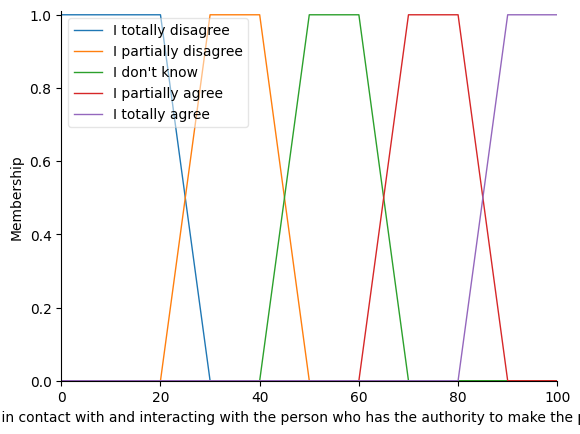

In [6]:
authorithyCtrl = ctrl.Antecedent(np.arange(0,101,1),AUTHORITY_DESC)

authorithyCtrl[TOTALLY_DISAGREE] = fuzz.trapmf(authorithyCtrl.universe, [0,0,20,30])
authorithyCtrl[PARTIALLY_DISAGREE] = fuzz.trapmf(authorithyCtrl.universe, [20,30,40,50])
authorithyCtrl[DONT_KNOW] = fuzz.trapmf(authorithyCtrl.universe, [40,50,60,70])
authorithyCtrl[PARTIALLY_AGREE] = fuzz.trapmf(authorithyCtrl.universe, [60,70,80,90])
authorithyCtrl[TOTALLY_AGREE] = fuzz.trapmf(authorithyCtrl.universe, [80,90,100,100])
authorithyCtrl.view( )

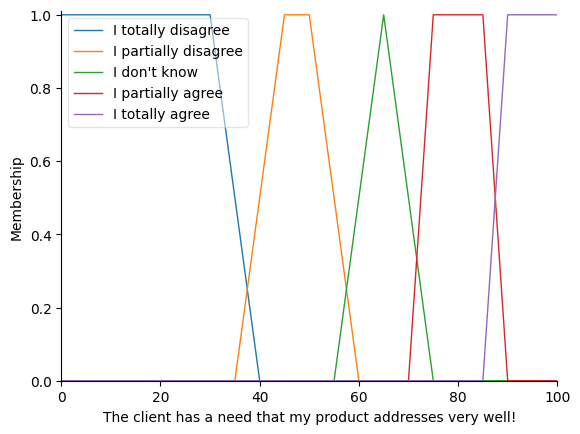

In [7]:
needCtrl = ctrl.Antecedent(np.arange(0,101,1),NEED_DESC)

needCtrl[TOTALLY_DISAGREE] = fuzz.trapmf(needCtrl.universe, [0,0,30,40])
needCtrl[PARTIALLY_DISAGREE] = fuzz.trapmf(needCtrl.universe, [35,45,50,60])
needCtrl[DONT_KNOW] = fuzz.trimf(needCtrl.universe, [55,65,75])
needCtrl[PARTIALLY_AGREE] = fuzz.trapmf(needCtrl.universe, [70,75,85,90])
needCtrl[TOTALLY_AGREE] = fuzz.trapmf(needCtrl.universe, [85,90,100,100])
needCtrl.view( )

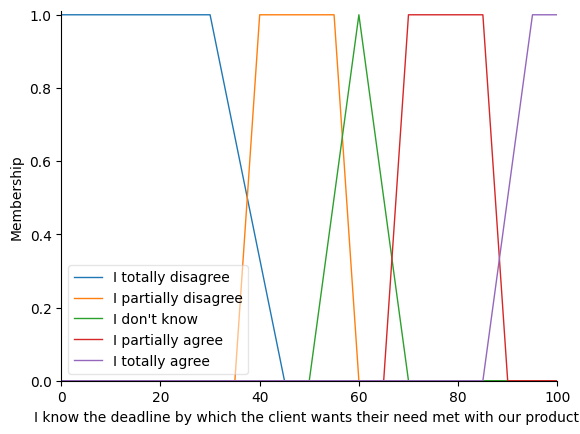

In [8]:
timeCtrl = ctrl.Antecedent(np.arange(0,101,1), TIME_DESC)

timeCtrl[TOTALLY_DISAGREE] = fuzz.trapmf(timeCtrl.universe, [0,0,30,45])
timeCtrl[PARTIALLY_DISAGREE] = fuzz.trapmf(timeCtrl.universe, [35,40,55,60])
timeCtrl[DONT_KNOW] = fuzz.trimf(timeCtrl.universe, [50,60,70])
timeCtrl[PARTIALLY_AGREE] = fuzz.trapmf(timeCtrl.universe, [65,70,85,90])
timeCtrl[TOTALLY_AGREE] = fuzz.trapmf(timeCtrl.universe, [85,95,100,100])
timeCtrl.view( )

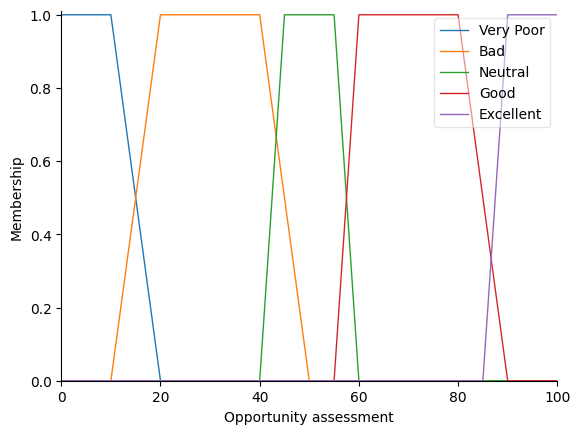

In [9]:
opportunityAssessmentCtrl = ctrl.Consequent(np.arange(0,101,1),OPPORTUNITY_ASSESSMENT_DESC)
opportunityAssessmentCtrl[VERYPOOR] = fuzz.trapmf(opportunityAssessmentCtrl.universe, [0,0,10,20])
opportunityAssessmentCtrl[BAD] = fuzz.trapmf(opportunityAssessmentCtrl.universe, [10,20,40,50])
opportunityAssessmentCtrl[NEUTRAL] = fuzz.trapmf(opportunityAssessmentCtrl.universe, [40,45,55,60])
opportunityAssessmentCtrl[GOOD] = fuzz.trapmf(opportunityAssessmentCtrl.universe, [55,60,80,90])
opportunityAssessmentCtrl[EXCELLENT] = fuzz.trapmf(opportunityAssessmentCtrl.universe, [85,90,100,100])
opportunityAssessmentCtrl.view( )

# Versão 1 das regras

In [10]:
ruleCtrl01 =   ctrl.Rule( needCtrl[TOTALLY_DISAGREE], opportunityAssessmentCtrl [VERYPOOR])

ruleCtrl02 =  ctrl.Rule( needCtrl[PARTIALLY_DISAGREE] &
                     ( budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE]), opportunityAssessmentCtrl [VERYPOOR] )

ruleCtrl03 =  ctrl.Rule( needCtrl[PARTIALLY_DISAGREE] &
                     ( budgetCtrl[DONT_KNOW] |
                      budgetCtrl[TOTALLY_AGREE] |
                      budgetCtrl[PARTIALLY_AGREE]), opportunityAssessmentCtrl [BAD] )


ruleCtrl04 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                     ( budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE]) &
                     ( authorithyCtrl[PARTIALLY_DISAGREE] |
                      authorithyCtrl[TOTALLY_DISAGREE]), opportunityAssessmentCtrl [BAD] )

ruleCtrl05 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                     ( budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE]) &
                     ( authorithyCtrl[DONT_KNOW] |
                      authorithyCtrl[PARTIALLY_AGREE] |
                      authorithyCtrl[TOTALLY_AGREE]), opportunityAssessmentCtrl [NEUTRAL] )

ruleCtrl06 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                      budgetCtrl[DONT_KNOW] &
                      authorithyCtrl[DONT_KNOW] &
                     (timeCtrl[DONT_KNOW] |
                      timeCtrl[PARTIALLY_DISAGREE] |
                      timeCtrl[TOTALLY_DISAGREE] )
                     , opportunityAssessmentCtrl [BAD] )

ruleCtrl07 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                      ( budgetCtrl[PARTIALLY_DISAGREE] |
                       budgetCtrl[TOTALLY_DISAGREE]) &
                      (authorithyCtrl[DONT_KNOW] |
                      authorithyCtrl[PARTIALLY_DISAGREE] |
                      authorithyCtrl[TOTALLY_DISAGREE] )
                     , opportunityAssessmentCtrl [NEUTRAL] )


ruleCtrl08 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                     (
                       budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE]) &
                     ( authorithyCtrl[DONT_KNOW] |
                      authorithyCtrl[PARTIALLY_DISAGREE] |
                      authorithyCtrl[TOTALLY_DISAGREE]), opportunityAssessmentCtrl [NEUTRAL] )

ruleCtrl09 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                     ( budgetCtrl[DONT_KNOW] |
                       budgetCtrl[PARTIALLY_AGREE] |
                      budgetCtrl[TOTALLY_AGREE]) &
                     ( authorithyCtrl[PARTIALLY_AGREE] |
                      authorithyCtrl[TOTALLY_AGREE]), opportunityAssessmentCtrl [GOOD] )


ruleCtrl10 =  ctrl.Rule( needCtrl[DONT_KNOW] &
                     ( budgetCtrl[DONT_KNOW] |
                       budgetCtrl[PARTIALLY_AGREE] |
                      budgetCtrl[TOTALLY_AGREE]) &
                     ( authorithyCtrl[PARTIALLY_AGREE] |
                      authorithyCtrl[TOTALLY_AGREE]), opportunityAssessmentCtrl [GOOD] )

ruleCtrl11 =  ctrl.Rule( needCtrl[PARTIALLY_AGREE] &
                     ( budgetCtrl[DONT_KNOW] |
                       budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE])   , opportunityAssessmentCtrl [NEUTRAL] )

ruleCtrl12 =  ctrl.Rule( needCtrl[PARTIALLY_AGREE] &
                     budgetCtrl[PARTIALLY_AGREE]     , opportunityAssessmentCtrl [GOOD] )

ruleCtrl13 =  ctrl.Rule( needCtrl[PARTIALLY_AGREE] &
                     budgetCtrl[TOTALLY_AGREE]     , opportunityAssessmentCtrl [EXCELLENT] )


ruleCtrl14 =  ctrl.Rule( needCtrl[TOTALLY_AGREE] &
                     (budgetCtrl[DONT_KNOW]   |
                      budgetCtrl[PARTIALLY_DISAGREE] |
                      budgetCtrl[TOTALLY_DISAGREE] ), opportunityAssessmentCtrl [NEUTRAL] )

ruleCtrl15 =  ctrl.Rule( needCtrl[TOTALLY_AGREE] &
                     budgetCtrl[PARTIALLY_AGREE]   , opportunityAssessmentCtrl [GOOD] )

ruleCtrl16 =  ctrl.Rule( needCtrl[TOTALLY_AGREE] &
                     budgetCtrl[TOTALLY_AGREE]   , opportunityAssessmentCtrl [EXCELLENT] )


In [11]:

systemCtrl = 0
systemCtrl = ctrl.ControlSystem([ruleCtrl01 , ruleCtrl02, ruleCtrl03, ruleCtrl04, ruleCtrl05, ruleCtrl06, ruleCtrl07, ruleCtrl08, ruleCtrl09,ruleCtrl10, ruleCtrl11,
                                      ruleCtrl12, ruleCtrl13, ruleCtrl14, ruleCtrl15, ruleCtrl16])

sistemSimulationCtrl = 0

sistemSimulationCtrl = ctrl.ControlSystemSimulation(systemCtrl)


# Versão 2 das regras

In [ ]:
ruleCtrl01 =   ctrl.Rule( needCtrl[TOTALLY_DISAGREE], opportunityAssessmentCtrl [VERYPOOR])


ruleCtrl02 =   ctrl.Rule( needCtrl[PARTIALLY_DISAGREE] &
                          ( budgetCtrl[PARTIALLY_DISAGREE] |
                           budgetCtrl[TOTALLY_DISAGREE]), opportunityAssessmentCtrl [VERYPOOR] )




In [ ]:

systemCtrl = 0
systemCtrl = ctrl.ControlSystem([ruleCtrl01 , ruleCtrl02, ruleCtrl03, ruleCtrl04, ruleCtrl05, ruleCtrl06, ruleCtrl07, ruleCtrl08, ruleCtrl09,ruleCtrl10, ruleCtrl11,
                                      ruleCtrl12, ruleCtrl13, ruleCtrl14, ruleCtrl15, ruleCtrl16])

sistemSimulationCtrl = 0

sistemSimulationCtrl = ctrl.ControlSystemSimulation(systemCtrl)


In [ ]:
print(  sistemSimulationCtrl.input )

print( sistemSimulationCtrl.output)

The client has a need that my product addresses very well! : 100
The client has already allocated a budget for the purchase of the offered product! : 75
I am already in contact with and interacting with the person who has the authority to make the purchase decision! : 60
I know the deadline by which the client wants their need met with our product! : 72

OrderedDict()


In [12]:
dataCollected =  [	[	90	,	40	,	90	,	84	],
	[	98	,	40	,	90	,	36	],
	[	90	,	70	,	90	,	88	],
	[	23	,	20	,	60	,	20	],
	[	105	,	20	,	90	,	88	],
	[	90	,	80	,	70	,	36	],
	[	75	,	80	,	90	,	20	],
	[	45	,	40	,	90	,	36	],
	[	75	,	60	,	90	,	100	],
	[	98	,	80	,	90	,	20	],
	[	75	,	80	,	90	,	76	],
	[	45	,	100	,	90	,	44	],
	[	75	,	80	,	90	,	76	],
	[	45	,	80	,	90	,	76	],
	[	45	,	80	,	100	,	76	],
	[	45	,	50	,	100	,	36	],
	[	45	,	80	,	100	,	80	],
	[	90	,	60	,	90	,	36	],
	[	68	,	80	,	100	,	88	],
	[	45	,	20	,	90	,	44	],
	[	45	,	30	,	90	,	20	],
	[	23	,	20	,	100	,	96	],
	[	75	,	20	,	90	,	68	],
	[	75	,	60	,	100	,	92	],
	[	68	,	80	,	80	,	92	],
	[	90	,	100	,	100	,	64	],
	[	90	,	80	,	100	,	80	],
	[	68	,	30	,	100	,	72	],
	[	23	,	20	,	90	,	76	],
	[	90	,	50	,	100	,	44	],
	[	90	,	80	,	100	,	80	],
	[	45	,	50	,	40	,	20	],
	[	90	,	50	,	100	,	72	],
	[	90	,	100	,	90	,	88	],
	[	45	,	80	,	90	,	80	],
	[	90	,	30	,	100	,	76	],
	[	60	,	80	,	100	,	80	],
	[	90	,	40	,	90	,	84	],
	[	98	,	40	,	90	,	36	],
	[	90	,	70	,	90	,	88	],
	[	90	,	40	,	90	,	88	],
	[	45	,	60	,	90	,	72	],
	[	30	,	80	,	100	,	88	],
	[	90	,	60	,	100	,	88	],
	[	30	,	80	,	100	,	20	],
	[	30	,	40	,	90	,	20	],
	[	23	,	80	,	100	,	36	],
	[	75	,	60	,	100	,	68	],
	[	75	,	60	,	100	,	72	],
	[	45	,	60	,	80	,	72	],
	[	90	,	60	,	100	,	68	],
	[	90	,	80	,	80	,	36	],
	[	105	,	100	,	100	,	88	],
	[	90	,	80	,	80	,	68	],
	[	45	,	100	,	100	,	20	],
	[	90	,	80	,	40	,	88	],
	[	23	,	60	,	100	,	20	],
	[	83	,	50	,	100	,	88	],
	[	105	,	60	,	100	,	96	],
	[	23	,	30	,	100	,	36	],
	[	45	,	90	,	100	,	88	],
	[	75	,	70	,	60	,	84	],
	[	90	,	80	,	100	,	72	],
	[	23	,	60	,	100	,	20	],
	[	75	,	40	,	100	,	20	],
	[	23	,	80	,	100	,	20	],
	[	45	,	60	,	100	,	36	],
	[	90	,	80	,	100	,	36	],
	[	38	,	60	,	100	,	36	],
	[	38	,	60	,	100	,	20	],
	[	75	,	60	,	100	,	72	]	]





In [13]:

ct=0
for opt in dataCollected:
  ct+=1
  sistemSimulationCtrl.input[BUDGET_DESC]=opt[0]
  sistemSimulationCtrl.input[AUTHORITY_DESC]=  opt[1]
  sistemSimulationCtrl.input[NEED_DESC]=opt[2]
  sistemSimulationCtrl.input[TIME_DESC]=opt[3]
  sistemSimulationCtrl.compute()
  print(ct,opt[0],opt[1],opt[2],opt[3],sistemSimulationCtrl.output[OPPORTUNITY_ASSESSMENT_DESC],sep=",")
  #print( sistemSimulationCtrl.output['Avaliação da Oportunidade'] )



1,90,40,90,84,93.66666666666669
2,98,40,90,36,93.66666666666669
3,90,70,90,88,93.66666666666669
4,23,20,60,20,35.608108108108105
5,105,20,90,88,93.66666666666669
6,90,80,70,36,71.9
7,75,80,90,20,71.36363636363636
8,45,40,90,36,50.00000000000001
9,75,60,90,100,71.36363636363636
10,98,80,90,20,93.66666666666669
11,75,80,90,76,71.36363636363636
12,45,100,90,44,50.00000000000001
13,75,80,90,76,71.36363636363636
14,45,80,90,76,50.00000000000001
15,45,80,100,76,50.00000000000001
16,45,50,100,36,50.00000000000001
17,45,80,100,80,50.00000000000001
18,90,60,90,36,93.66666666666669
19,68,80,100,88,69.41176113237348
20,45,20,90,44,50.00000000000001
21,45,30,90,20,50.00000000000001
22,23,20,100,96,49.99999999999999
23,75,20,90,68,71.36363636363636
24,75,60,100,92,71.36363636363636
25,68,80,80,92,69.41176113237348
26,90,100,100,64,93.66666666666669
27,90,80,100,80,93.66666666666669
28,68,30,100,72,69.41176113237348
29,23,20,90,76,49.99999999999999
30,90,50,100,44,93.66666666666669
31,90,80,100,80,9

OrderedDict([('Avaliação da Oportunidade', 50.00000000000001)])


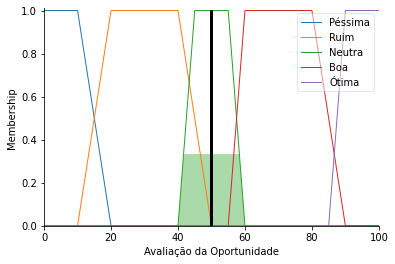

In [ ]:
#exemplo
sistemSimulationCtrl.input['The client has already allocated a budget for the purchase of the offered product!']=65
sistemSimulationCtrl.input['Ja estou falando com quem tem authorithyCtrl para decidir!']=80
sistemSimulationCtrl.input['O cliente tem uma needCtrl que eu endereco muito bem com meu produto!']=95
sistemSimulationCtrl.input['Sei timeCtrl em que o cliente quer ter sua needCtrl atendida com nosso produto!']=45
sistemSimulationCtrl.compute()
print(sistemSimulationCtrl.output )
opportunityAssessmentCtrl.view(sim=sistemSimulationCtrl)